In [7]:
from qiskit import *
q = QuantumRegister(5,"q")
c = ClassicalRegister(5,"c")
circuit = QuantumCircuit(q,c)


circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])
circuit.x(q[4])
circuit.u1(-0.0706860, q[0])
circuit.u1(-0.1335178, q[1])
circuit.u1(-0.2356196, q[2])
circuit.u1(-0.3141594, q[3])
circuit.cx(q[4],q[0])
circuit.u1(0.3848452, q[0])
circuit.cx(q[4],q[1])
circuit.h(q[0])
circuit.cx(q[4],q[2])
circuit.u1(1.0210178, q[2])
circuit.h(q[1])
circuit.cx(q[4],q[3])
circuit.u1(1.8849556, q[3])
circuit.h(q[2])
circuit.h(q[3])
circuit.measure(q[3], c[3])
circuit.measure(q[2], c[2])
circuit.measure(q[1], c[1])
circuit.measure(q[0], c[0])
circuit.measure(q[4], c[4])

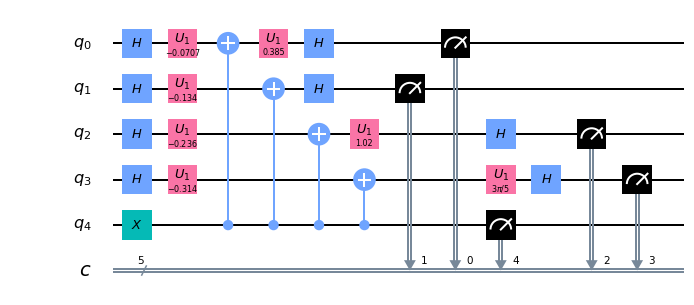

In [5]:
circuit.draw(output='mpl')

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()

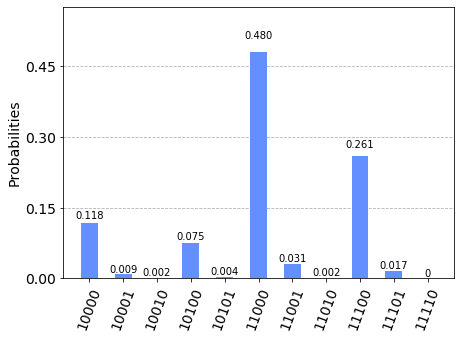

In [9]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [9]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
job = execute(circuit,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [12]:
result = job.result()

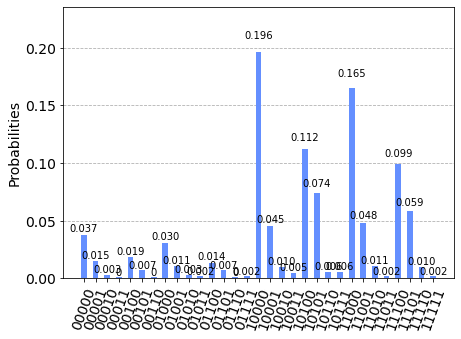

In [13]:
plot_histogram(result.get_counts(circuit))

In [5]:
from qiskit import *
q = QuantumRegister(5,"q")
c = ClassicalRegister(5,"c")
circuit2 = QuantumCircuit(q,c)

circuit2.h(q[0])
circuit2.h(q[1])
circuit2.x(q[2])
circuit2.h(q[3])
circuit2.h(q[4])
circuit2.u1(-0.0706860, q[0])
circuit2.u1(-0.1335178, q[1])
circuit2.u1(-0.3141594, q[3])
circuit2.u1(-0.2356196, q[4])
circuit2.cx(q[2],q[0])
circuit2.h(q[3])
circuit2.h(q[4])
circuit2.u1(0.3848452, q[0])
circuit2.cx(q[2],q[1])
circuit2.h(q[0])
circuit2.u1(0.6047566, q[1])
circuit2.h(q[2])
circuit2.h(q[1])
circuit2.cx(q[3],q[2])
circuit2.cx(q[4],q[2])
circuit2.h(q[2])
circuit2.h(q[3])
circuit2.h(q[4])
circuit2.u1(1.8849556, q[3])
circuit2.u1(1.0210178, q[4])
circuit2.h(q[3])
circuit2.h(q[4])
circuit2.measure(q[4], c[2])
circuit2.measure(q[3], c[3])
circuit2.measure(q[1], c[1])
circuit2.measure(q[0], c[0])
circuit2.measure(q[2], c[4])

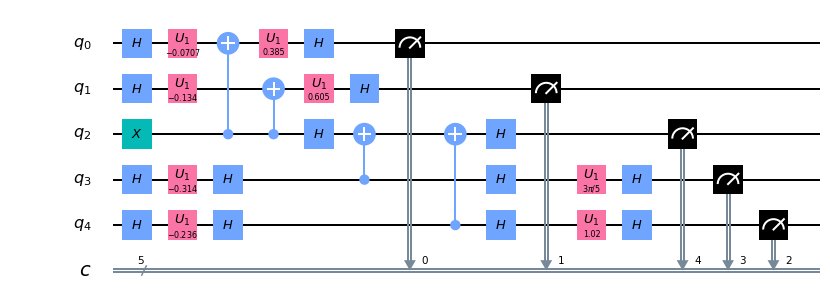

In [6]:
circuit2.draw(output='mpl')

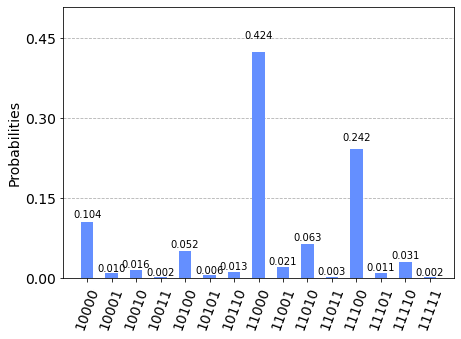

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit2, backend = simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit2))

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


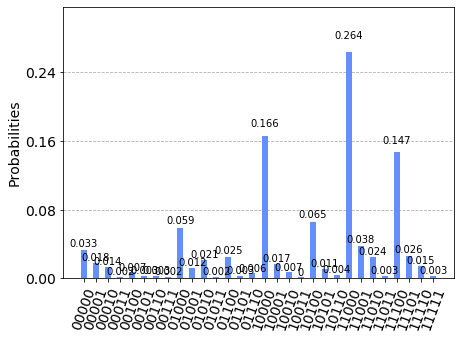

In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
job = execute(circuit2,backend=qcomp, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit2))

In [12]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [13]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit2.qregs[0], circlabel = 'measerrormitigationcal')

5e8866b1f226f400112c0eda
Job Status: job has successfully run


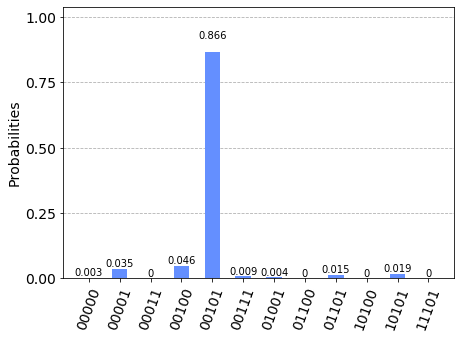

In [16]:
cal_circuits[2].draw(output='mpl')
len(cal_circuits)
cal_job = execute(cal_circuits, backend = qcomp, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[5])
              )

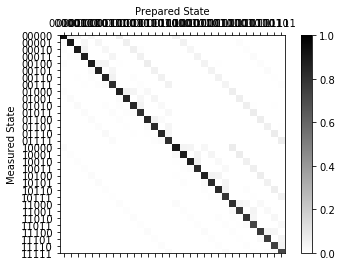

In [18]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

In [19]:
meas_filter = meas_fitter.filter

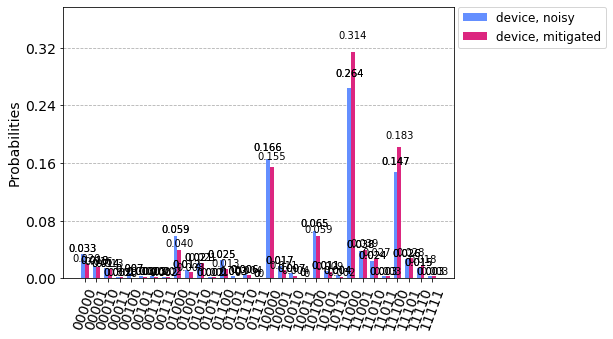

In [22]:
mitigated_results = meas_filter.apply(result)
device_counts = result.get_counts(circuit2)
mitigated_counts = mitigated_results.get_counts(circuit2)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])